In [20]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import seaborn as sns

from scipy.stats import boxcox, probplot
import matplotlib.pyplot as plt

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-0.0.1">Обзор данных</a></span></li><li><span><a href="#Целевая-переменная" data-toc-modified-id="Целевая-переменная-0.0.2">Целевая переменная</a></span></li><li><span><a href="#Случайное-разбиение-на-обучение-и-тест" data-toc-modified-id="Случайное-разбиение-на-обучение-и-тест-0.0.3">Случайное разбиение на обучение и тест</a></span></li><li><span><a href="#Линейные-модели" data-toc-modified-id="Линейные-модели-0.0.4">Линейные модели</a></span></li><li><span><a href="#Другое-разбиение-для-обучения-и-валидации" data-toc-modified-id="Другое-разбиение-для-обучения-и-валидации-0.0.5">Другое разбиение для обучения и валидации</a></span></li></ul></li></ul></li></ul></div>

### Обзор данных

In [2]:
data = pd.read_csv('data\calls_dataset_with_features.csv')

In [3]:
data.head()

,address,duration_minutes,feat_1,feat_2,geometry,poly_side,atm,bank,bus_station,bus_stop,cafe,device_charging_station,office,public_service,restaurant,shelter,station,traffic_signals,waste_basket
0,8811aa602dfffff,5.092667,0.0,25.0,"POLYGON ((37.75103240708841 55.80603592669851,...",poly3,1.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,8811aa45d9fffff,6.037037,0.0,63.0,"POLYGON ((37.40263832553934 55.71842073952227,...",poly0,5.0,3.0,0.0,5.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,881181a235fffff,4.722727,0.0,11.0,"POLYGON ((37.74271427608124 55.43691297888912,...",poly1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8811aa722bfffff,5.868982,0.0,36.0,"POLYGON ((37.42241082476207 55.85767681439805,...",poly2,2.0,2.0,0.0,12.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8811aa714dfffff,2.937719,0.0,19.0,"POLYGON ((37.45469517717559 55.7843306893976, ...",poly2,1.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


### Целевая переменная

In [4]:
data = data[data['duration_minutes'] != 0]
X = data.drop(['address', 'geometry', 'poly_side', 'duration_minutes'],axis=1)
y = (data['duration_minutes'])

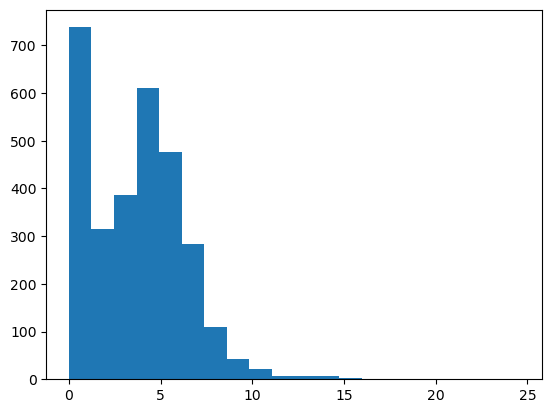

In [5]:
plt.hist(y, bins=20)
plt.show()

QQ plot для сравнения с нормальным распределением

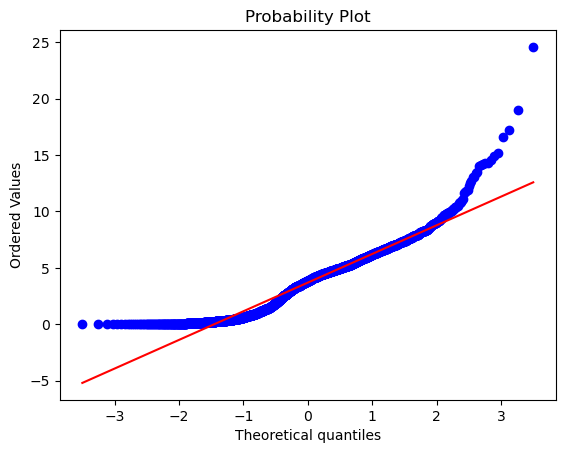

In [15]:
f, ax = plt.subplots()
probplot(y, plot=ax);

Преобразование логарифм

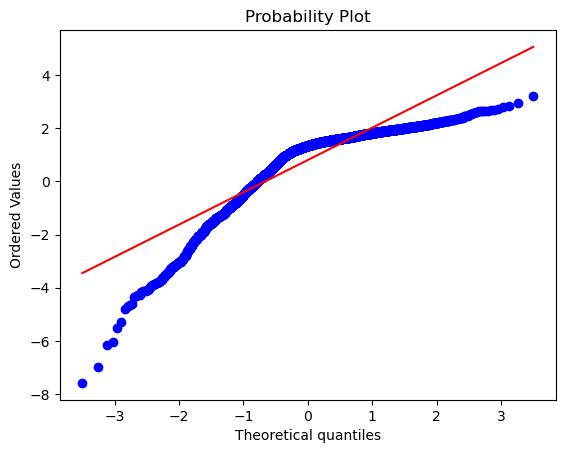

In [6]:
f, ax = plt.subplots()
probplot(np.log(y),plot=ax);

преобразование Бокса-Кокса

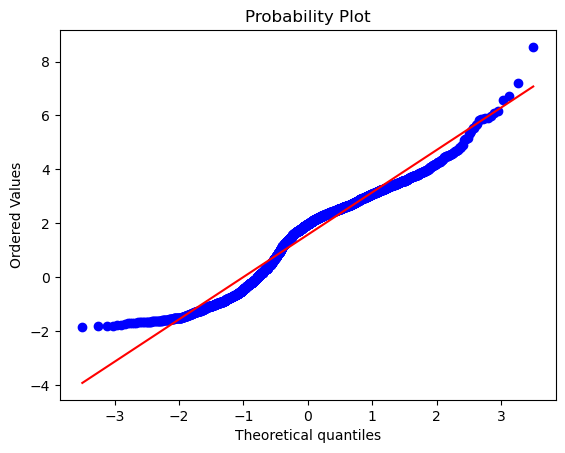

In [7]:
f, ax = plt.subplots()
probplot(boxcox(y)[0],plot=ax);

Матрица корреляции

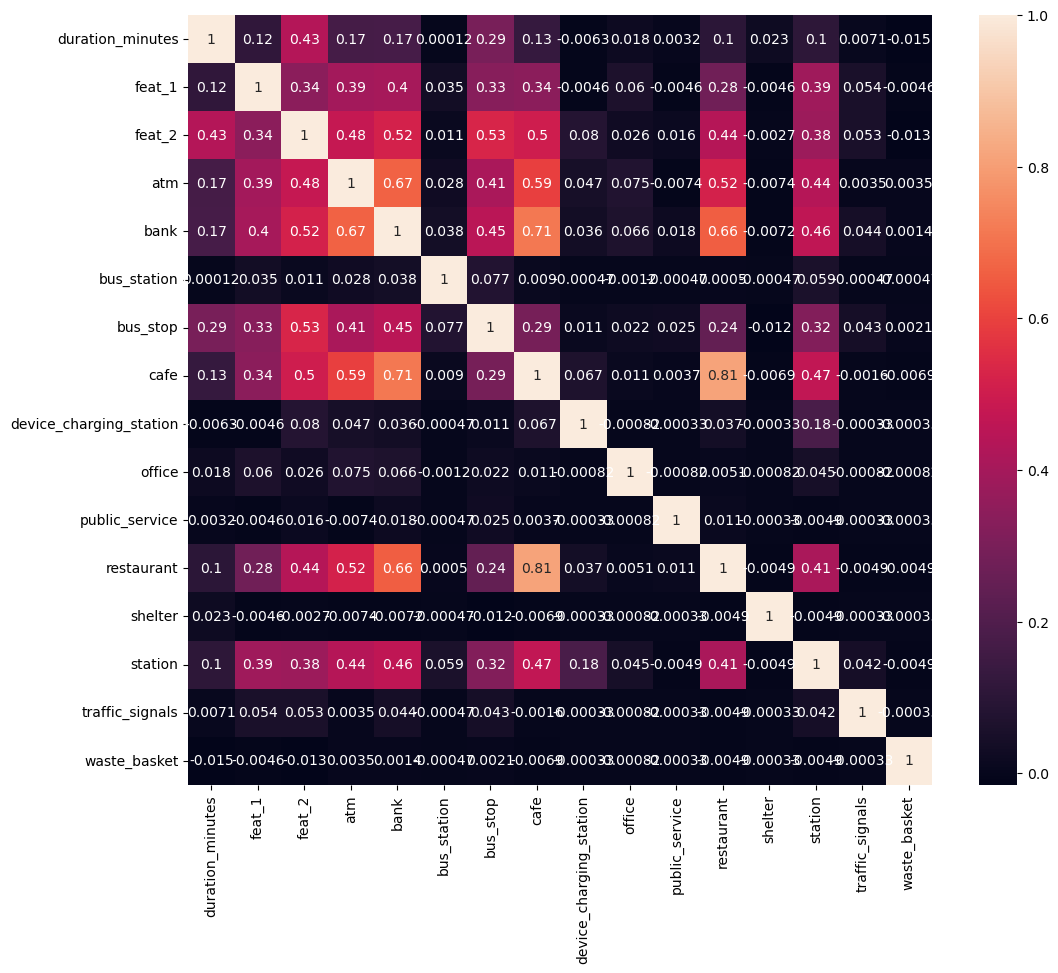

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.drop(['address', 'geometry', 'poly_side'], axis=1).corr(), annot=True);

### Случайное разбиение на обучение и тест

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=18)

In [23]:
scaler = StandardScaler()

In [24]:
X_train_scale = scaler.fit_transform(X_train)
X_valid_scale = scaler.transform(X_valid)

### Линейные модели

In [25]:
def train_model(model, X_train, y_train, X_valid, y_valid, feature_names):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    
    print("RMSE: {}".format(np.sqrt(mean_squared_error((y_valid), (y_pred)))))
    
    print(pd.DataFrame(model.coef_, index=feature_names, 
                       columns=['weight']).sort_values(by='weight', ascending=False))

In [26]:
linreg = LinearRegression()

In [27]:
train_model(linreg, X_train_scale, y_train, X_valid_scale, y_valid, X_train.columns)

RMSE: 2.290509406242996
                           weight
feat_2                   1.235282
bus_stop                 0.263094
shelter                  0.077573
atm                      0.019303
office                   0.002485
bus_station              0.000000
traffic_signals          0.000000
public_service          -0.018653
waste_basket            -0.031807
station                 -0.068456
bank                    -0.072375
cafe                    -0.104380
device_charging_station -0.113731
feat_1                  -0.126434
restaurant              -0.149229


In [28]:
lasso = Lasso(random_state=16, alpha=0.01)
train_model(lasso, X_train_scale, y_train, X_valid_scale, y_valid, X_train.columns)

RMSE: 2.2889677994234274
                           weight
feat_2                   1.215399
bus_stop                 0.252435
shelter                  0.067575
atm                      0.000000
bus_station              0.000000
office                   0.000000
traffic_signals          0.000000
public_service          -0.008562
waste_basket            -0.021852
bank                    -0.052539
station                 -0.059840
cafe                    -0.099036
device_charging_station -0.103964
feat_1                  -0.112683
restaurant              -0.143008


In [29]:
lasso_cv = LassoCV(random_state=16)
train_model(lasso_cv, X_train_scale, y_train, X_valid_scale, y_valid, X_train.columns)

RMSE: 2.2882477144098416
                           weight
feat_2                   1.201973
bus_stop                 0.244370
shelter                  0.061277
atm                      0.000000
bus_station              0.000000
office                   0.000000
traffic_signals          0.000000
public_service          -0.001919
waste_basket            -0.015639
bank                    -0.044148
station                 -0.055747
cafe                    -0.097255
device_charging_station -0.097736
feat_1                  -0.105424
restaurant              -0.139621


In [30]:
ridge = Ridge(random_state=16)
train_model(ridge, X_train_scale, y_train, X_valid_scale, y_valid, X.columns)

RMSE: 2.2904408613367075
                           weight
feat_2                   1.234264
bus_stop                 0.263285
shelter                  0.077541
atm                      0.019330
office                   0.002496
bus_station              0.000000
traffic_signals          0.000000
public_service          -0.018634
waste_basket            -0.031805
station                 -0.068390
bank                    -0.072226
cafe                    -0.104249
device_charging_station -0.113619
feat_1                  -0.126263
restaurant              -0.149047


In [31]:
ridge_cv = RidgeCV()
train_model(ridge_cv, X_train_scale, y_train, X_valid_scale, y_valid, X.columns)

RMSE: 2.2898443523063996
                           weight
feat_2                   1.225182
bus_stop                 0.264966
shelter                  0.077250
atm                      0.019576
office                   0.002593
bus_station              0.000000
traffic_signals          0.000000
public_service          -0.018470
waste_basket            -0.031789
station                 -0.067793
bank                    -0.070901
cafe                    -0.103080
device_charging_station -0.112623
feat_1                  -0.124734
restaurant              -0.147427


### Другое разбиение для обучения и валидации

In [32]:
X_train = data.drop(['address', 'geometry', 
                     'poly_side','duration_minutes'],axis=1)[data['poly_side'].isin(['poly1','poly2'])]

y_train = (data['duration_minutes'][data['poly_side'].isin(['poly1','poly2'])])

In [33]:
X_valid = data.drop(['address', 'geometry', 
                     'poly_side','duration_minutes'],axis=1)[data['poly_side'].isin(['poly0','poly3'])]

y_valid = (data['duration_minutes'][data['poly_side'].isin(['poly0','poly3'])])

Фиксируем данное разбиение и будем его использовать в дальнейшем

In [34]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_valid_scale = scaler.transform(X_valid)

In [35]:
lasso = LassoCV(random_state=16)
train_model(lasso, X_train_scale, y_train, X_valid_scale, y_valid, X.columns)

RMSE: 2.3391939118553915
                           weight
feat_2                   1.070939
bus_stop                 0.437980
shelter                  0.074464
atm                      0.000000
office                  -0.000000
public_service           0.000000
traffic_signals          0.000000
waste_basket            -0.023015
bus_station             -0.025701
feat_1                  -0.035793
station                 -0.059550
device_charging_station -0.088731
bank                    -0.102413
restaurant              -0.102477
cafe                    -0.135653


In [36]:
ridge = RidgeCV()
train_model(ridge, X_train_scale, y_train, X_valid_scale, y_valid, X.columns)

RMSE: 2.340947922194543
                           weight
feat_2                   1.091139
bus_stop                 0.459396
shelter                  0.090896
atm                      0.032191
public_service           0.000000
traffic_signals          0.000000
office                  -0.004292
waste_basket            -0.039776
bus_station             -0.043209
feat_1                  -0.055045
station                 -0.068539
device_charging_station -0.104465
restaurant              -0.108601
bank                    -0.133766
cafe                    -0.146877
